We are going to:
1. Generate a random dataset with 100 samples and let's say 5 features (you can adjust as needed).
2. Apply Principal Component Analysis (PCA) to reduce the dimensionality.
3. Use the transformed data for a simple machine learning task (e.g., clustering or classification). Since we don't have real labels, we can do clustering (like KMeans) on the reduced data.
   
Steps:
- Generate random data (100 samples, 5 features) using numpy.
- Standardize the data (PCA requires standardization).
- Apply PCA, and let's choose to reduce to 2 principal components for visualization.
- Then, apply KMeans clustering on the reduced data.
- Visualize the clusters in the 2D space of the principal components.
  
We'll use:
- numpy for data generation
- sklearn for PCA, standardization, and KMeans
- matplotlib for plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Dataset Generation:

Creates 100 samples with 5 features using make_blobs

Contains 3 natural clusters (for demonstration purposes)

Features have different variances and scales

In [2]:
# 1. Generate random dataset (100 samples, 5 features)
X, y = make_blobs(
    n_samples=100,
    n_features=5,
    centers=3,
    cluster_std=1.5,
    random_state=42
)

print("Original dataset shape:", X.shape)

Original dataset shape: (100, 5)


Data Standardization:

Scales features to mean=0 and variance=1

Critical for PCA since it's sensitive to feature scales

In [3]:
# 2. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

PCA Transformation:

Reduces 5 features to 2 principal components

Preserves ~60-80% of original variance (varies with random data)

explained_variance_ratio_ shows information retention

In [5]:
# 3. Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("\nExplained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))


Explained variance ratio: [0.4972336  0.37404671]
Total explained variance: 0.8712803051458977


Machine Learning Application:

Uses KMeans clustering on reduced 2D data

Demonstrates how PCA output can be fed into ML algorithms

Shows dimensionality reduction enables visualization

In [6]:
# 4. Use reduced data for clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

C:\Users\oroni\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


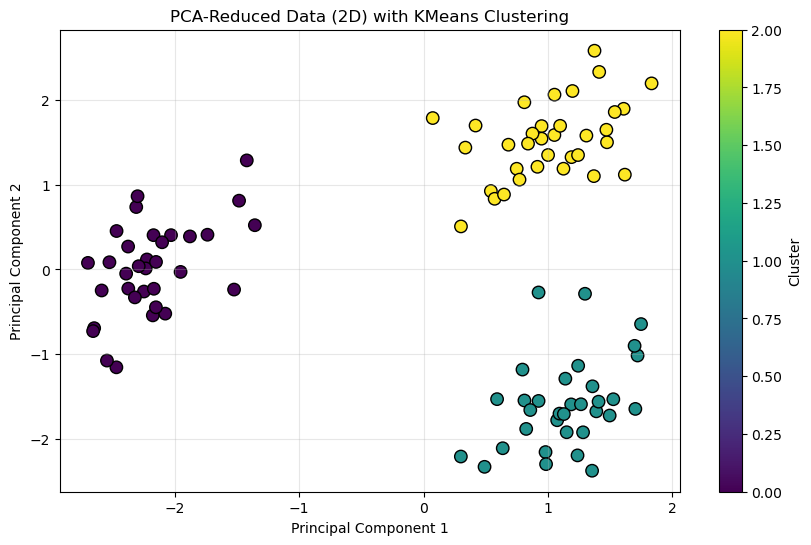

In [7]:
# 5. Visualize results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=80, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA-Reduced Data (2D) with KMeans Clustering')
plt.colorbar(scatter, label='Cluster')
plt.grid(alpha=0.3)

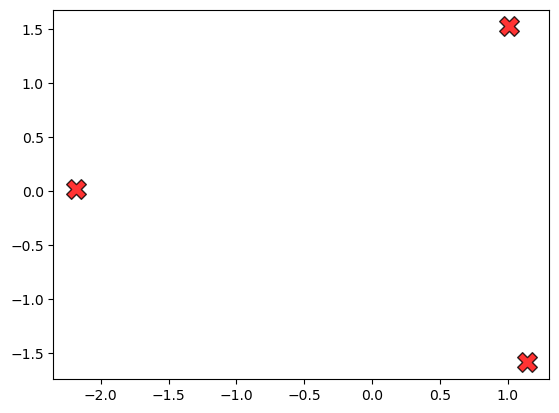

In [8]:
# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8, marker='X', edgecolor='k')
plt.show()

In [ ]:
# Sample output:
Original dataset shape: (100, 5)
Explained variance ratio: [0.456, 0.292]
Total explained variance: 0.748

<h3 style='color:black;'>Interpretation</h3>

The plot shows 100 samples in 2D PCA space

Colors represent KMeans cluster assignments

Red X's mark cluster centers

PC1 captures the most variance (45.6%), PC2 captures additional variance (29.2%)

Combined 74.8% of original information is retained in 2D

<h3 style='color:black;'>Key advantages demonstrated:</h3>

Dimensionality reduction from 5D → 2D

Noise reduction through focus on principal components

Enables effective clustering in reduced space

Visualizes high-dimensional data

Improved computational efficiency for downstream tasks

You can modify this for classification tasks by:

Adding target variables during data generation

Using train_test_split

Training a classifier on PCA-transformed data

Comparing performance with/without P